# EDA

**Task/Project:** Detecting Multilingual, Multicultural and Multievent Online Polarization

Provide abstract of script when done...

**Abstract:**

In [47]:
import os
import pandas as pd

#Define paths (since your notebook is inside 'subtask1/')
TRAIN_PATH = "train/arb.csv"
DEV_PATH   = "dev/arb.csv"

# Check if files exist before loading
print("Checking file paths...\n")

if os.path.exists(TRAIN_PATH):
    print(f"✅ Found TRAIN file at: {TRAIN_PATH}")
else:
    print(f"❌ TRAIN file not found at: {TRAIN_PATH}")

if os.path.exists(DEV_PATH):
    print(f"✅ Found DEV file at:   {DEV_PATH}")
else:
    print(f"❌ DEV file not found at: {DEV_PATH}")

# Load the CSVs
train_df = pd.read_csv(TRAIN_PATH)
dev_df   = pd.read_csv(DEV_PATH)

# Display summary info
print("\n--- Data Loaded Successfully ---")
print(f"Train shape: {train_df.shape}")
print(f"Dev shape:   {dev_df.shape}")
print("\nTrain columns:", list(train_df.columns))
print("Dev columns:", list(dev_df.columns))


Checking file paths...

✅ Found TRAIN file at: train/arb.csv
✅ Found DEV file at:   dev/arb.csv

--- Data Loaded Successfully ---
Train shape: (3380, 3)
Dev shape:   (169, 3)

Train columns: ['id', 'text', 'polarization']
Dev columns: ['id', 'text', 'polarization']


In [48]:
# Basic EDA on Training Set

# 1. Dataset overview
print("=" * 50)
print("TRAINING SET OVERVIEW")
print("=" * 50)
print(f"\nShape: {train_df.shape}")
print(f"\nColumns: {train_df.columns.tolist()}")
print(f"\nData types:\n{train_df.dtypes}")

# 2. Missing values
print("\n" + "=" * 50)
print("MISSING VALUES")
print("=" * 50)
print(train_df.isnull().sum())


TRAINING SET OVERVIEW

Shape: (3380, 3)

Columns: ['id', 'text', 'polarization']

Data types:
id              object
text            object
polarization     int64
dtype: object

MISSING VALUES
id              0
text            0
polarization    0
dtype: int64


POLARIZATION DISTRIBUTION

Counts:
polarization
0    1868
1    1512
Name: count, dtype: int64

Percentages:
polarization
0    55.266272
1    44.733728
Name: proportion, dtype: float64


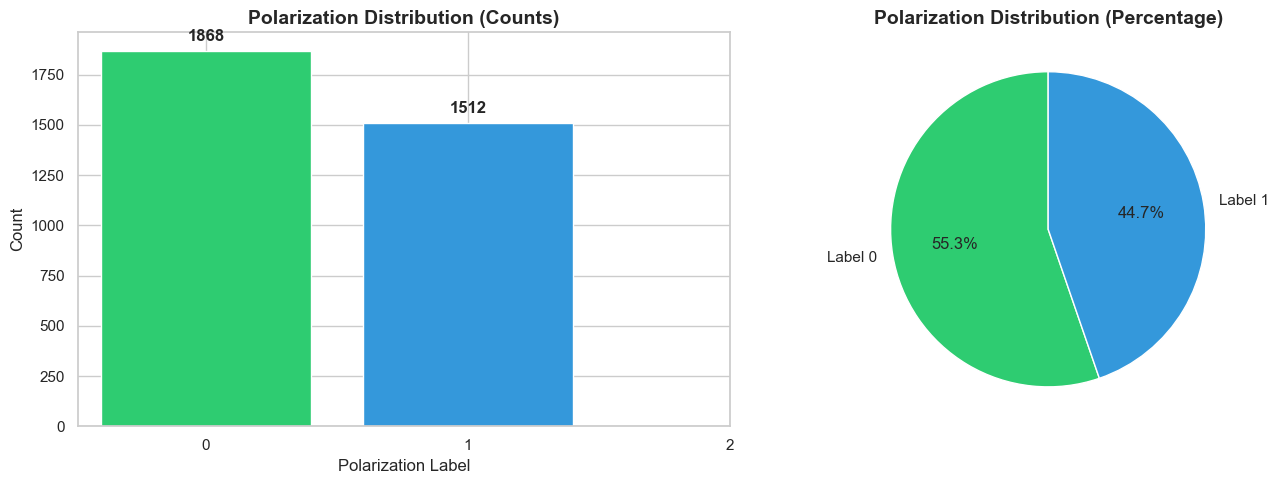

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Polarization distribution
print("=" * 50)
print("POLARIZATION DISTRIBUTION")
print("=" * 50)

# Count and percentage
label_counts = train_df['polarization'].value_counts().sort_index()
label_percentages = train_df['polarization'].value_counts(normalize=True).sort_index() * 100

print("\nCounts:")
print(label_counts)
print("\nPercentages:")
print(label_percentages)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(label_counts.index, label_counts.values, color=['#2ecc71', '#3498db', '#e74c3c'])
axes[0].set_xlabel('Polarization Label', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Polarization Distribution (Counts)', fontsize=14, fontweight='bold')
axes[0].set_xticks([0, 1, 2])
for i, v in enumerate(label_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#3498db', '#e74c3c']
axes[1].pie(label_counts.values, labels=[f'Label {i}' for i in label_counts.index], 
            autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Polarization Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


TEXT CHARACTER ANALYSIS

📊 Length Statistics:
Average text length: 94.76 characters
Median text length: 88.00 characters
Min text length: 22 characters
Max text length: 465 characters
Std deviation: 44.57

📝 Word Statistics:
Average word count: 16.71 words
Average word length: 5.73 characters


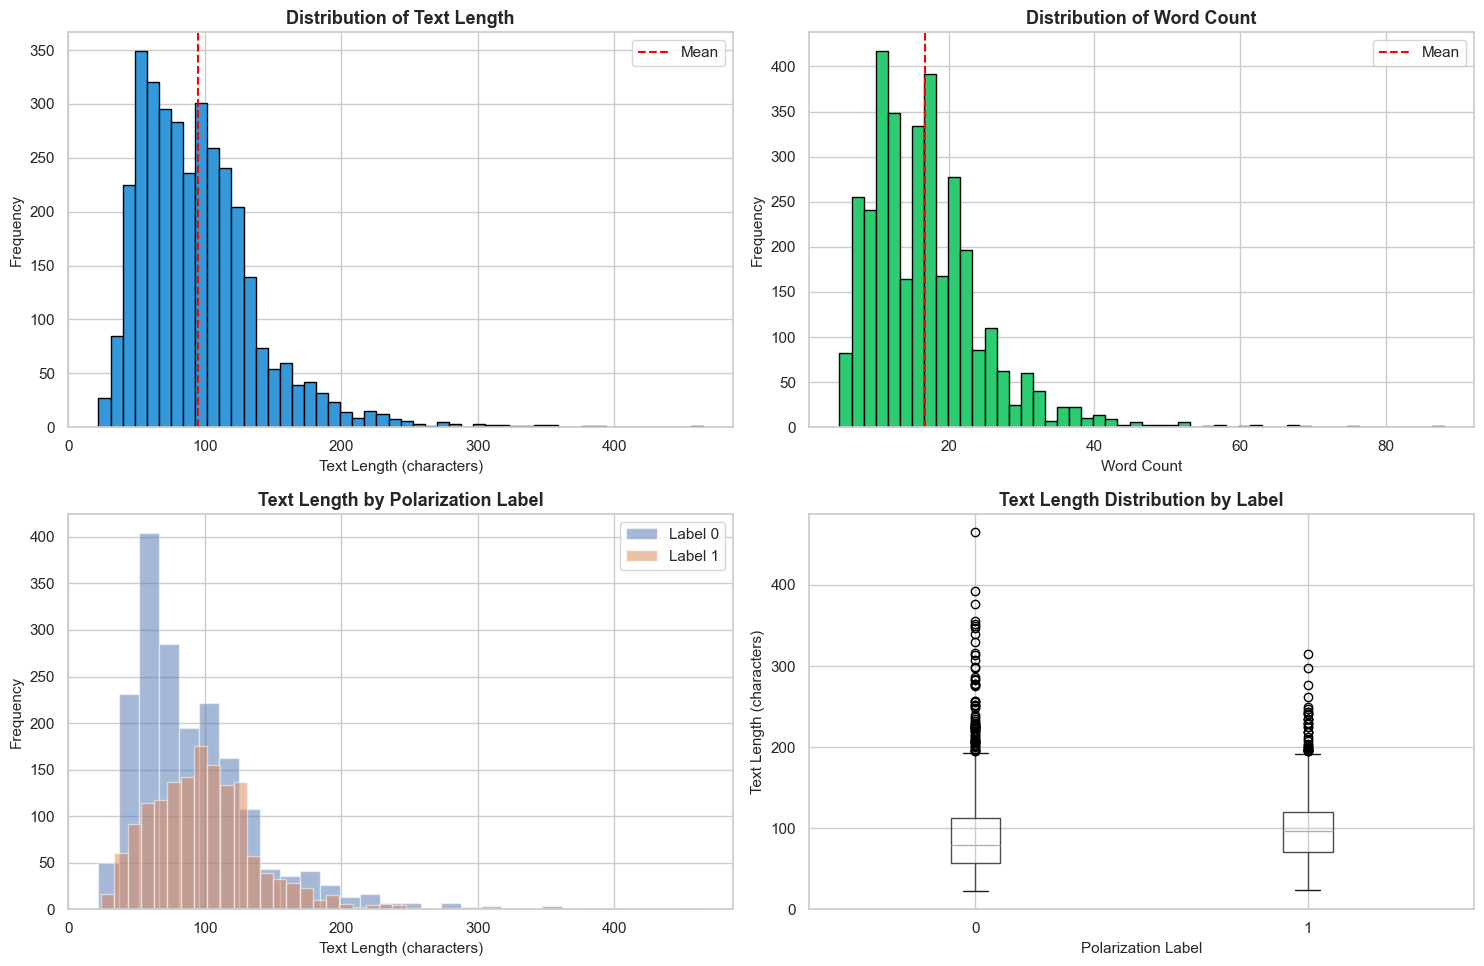


TEXT LENGTH BY POLARIZATION LABEL
               count       mean        std   min   25%   50%    75%    max
polarization                                                              
0             1868.0  91.403105  48.270170  22.0  57.0  79.0  112.0  465.0
1             1512.0  98.904101  39.135167  24.0  71.0  96.0  120.0  315.0


In [50]:
# Text Character Analysis

print("=" * 50)
print("TEXT CHARACTER ANALYSIS")
print("=" * 50)

# Calculate text statistics
train_df['text_length'] = train_df['text'].str.len()
train_df['word_count'] = train_df['text'].str.split().str.len()
train_df['avg_word_length'] = train_df['text_length'] / train_df['word_count']

# Summary statistics
print("\n📊 Length Statistics:")
print(f"Average text length: {train_df['text_length'].mean():.2f} characters")
print(f"Median text length: {train_df['text_length'].median():.2f} characters")
print(f"Min text length: {train_df['text_length'].min()} characters")
print(f"Max text length: {train_df['text_length'].max()} characters")
print(f"Std deviation: {train_df['text_length'].std():.2f}")

print("\n📝 Word Statistics:")
print(f"Average word count: {train_df['word_count'].mean():.2f} words")
print(f"Average word length: {train_df['avg_word_length'].mean():.2f} characters")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Text length distribution
axes[0, 0].hist(train_df['text_length'], bins=50, color='#3498db', edgecolor='black')
axes[0, 0].set_xlabel('Text Length (characters)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Distribution of Text Length', fontsize=13, fontweight='bold')
axes[0, 0].axvline(train_df['text_length'].mean(), color='red', linestyle='--', label='Mean')
axes[0, 0].legend()

# 2. Word count distribution
axes[0, 1].hist(train_df['word_count'], bins=50, color='#2ecc71', edgecolor='black')
axes[0, 1].set_xlabel('Word Count', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Distribution of Word Count', fontsize=13, fontweight='bold')
axes[0, 1].axvline(train_df['word_count'].mean(), color='red', linestyle='--', label='Mean')
axes[0, 1].legend()

# 3. Text length by polarization label
for label in sorted(train_df['polarization'].unique()):
    axes[1, 0].hist(train_df[train_df['polarization'] == label]['text_length'], 
                    bins=30, alpha=0.5, label=f'Label {label}')
axes[1, 0].set_xlabel('Text Length (characters)', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Text Length by Polarization Label', fontsize=13, fontweight='bold')
axes[1, 0].legend()

# 4. Boxplot of text length by label
train_df.boxplot(column='text_length', by='polarization', ax=axes[1, 1])
axes[1, 1].set_xlabel('Polarization Label', fontsize=11)
axes[1, 1].set_ylabel('Text Length (characters)', fontsize=11)
axes[1, 1].set_title('Text Length Distribution by Label', fontsize=13, fontweight='bold')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

# Text length statistics by label
print("\n" + "=" * 50)
print("TEXT LENGTH BY POLARIZATION LABEL")
print("=" * 50)
print(train_df.groupby('polarization')['text_length'].describe())


NUMERIC & ENGLISH CHARACTER ANALYSIS

📊 Presence Statistics:
Texts with numbers: 364 (10.77%)
Texts with English characters: 55 (1.63%)

📈 Count Statistics:
Average numbers per text: 0.38
Average English chars per text: 0.12
Max numbers in a text: 20
Max English chars in a text: 28


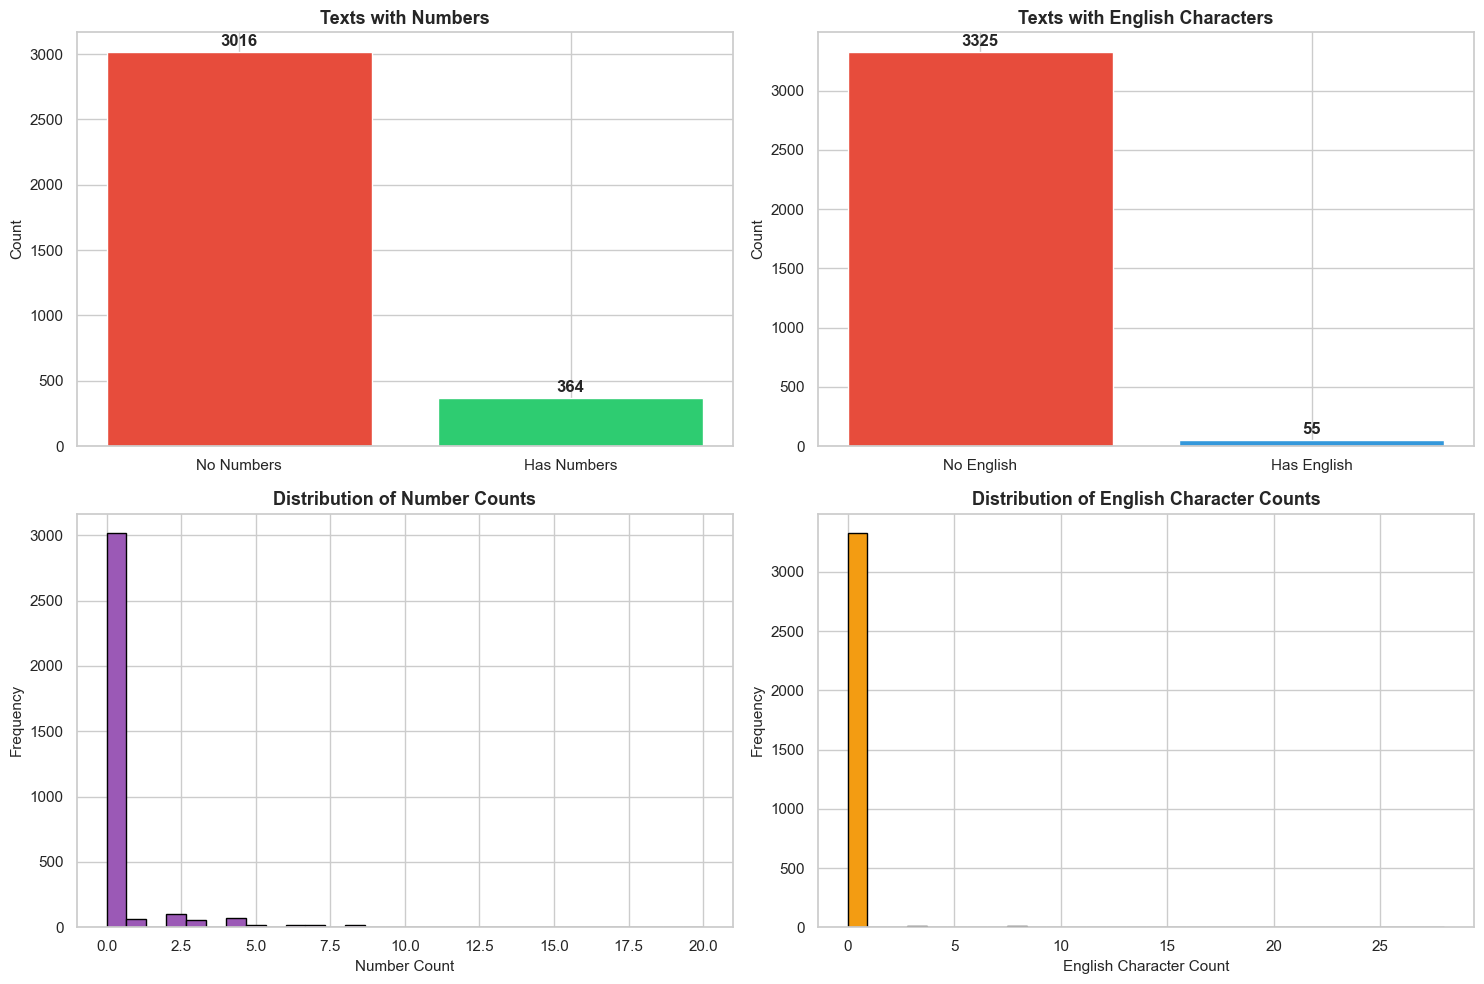


BY POLARIZATION LABEL

Texts with Numbers:
polarization
0    300
1     64
Name: has_numbers, dtype: int64

Texts with English:
polarization
0    34
1    21
Name: has_english, dtype: int64

EXAMPLES

🔢 Examples with NUMBERS:
--------------------------------------------------

Label: 1
Text: أول شي انتي تشبهين شغالتنا في البيت

ثاني شي انتي ملكة جمال الإزباله

3 جميع الاسعودين أحلى منك انتي...
Number count: 1

Label: 1
Text: انتي عايزة سرير ويكون معاكى ٤ رجالة يفرتكو كس امك نيك..انتي تمامك كدة...
Number count: 1

Label: 1
Text: شو هيدي الفنانه ،،قي قمة السفله
راغب وشمس وفرح ونانسي تاج ع راسها
لتخلوها في برنامج ارب ايدل موسم 4
كل يكرها ميحبها...
Number count: 1


🔤 Examples with ENGLISH CHARACTERS:
--------------------------------------------------

Label: 1
Text: مين عم يقول الdislikeأكتر؟؟؟ههههه
ياحبيبي طلعت شاذة كمان هاد الناقص
يلعن شكلك بومة مسخرة بس يلعن أبو المصاري
تضربي بس شوفك بستفرغ...
English char count: 7

Label: 1
Text: ليش  بصلتكم محرووقه؟؟!!  KISS  اخت الاعلام ,  و كس  اخت 

In [51]:
# Analysis of Numbers and English Characters

print("=" * 50)
print("NUMERIC & ENGLISH CHARACTER ANALYSIS")
print("=" * 50)

# Check for numbers and English characters
train_df['has_numbers'] = train_df['text'].str.contains(r'\d', regex=True)
train_df['has_english'] = train_df['text'].str.contains(r'[a-zA-Z]', regex=True)
train_df['num_count'] = train_df['text'].str.count(r'\d')
train_df['english_char_count'] = train_df['text'].str.count(r'[a-zA-Z]')

# Summary statistics
print("\n📊 Presence Statistics:")
print(f"Texts with numbers: {train_df['has_numbers'].sum()} ({train_df['has_numbers'].mean()*100:.2f}%)")
print(f"Texts with English characters: {train_df['has_english'].sum()} ({train_df['has_english'].mean()*100:.2f}%)")

print("\n📈 Count Statistics:")
print(f"Average numbers per text: {train_df['num_count'].mean():.2f}")
print(f"Average English chars per text: {train_df['english_char_count'].mean():.2f}")
print(f"Max numbers in a text: {train_df['num_count'].max()}")
print(f"Max English chars in a text: {train_df['english_char_count'].max()}")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Presence of numbers
has_num_counts = train_df['has_numbers'].value_counts()
axes[0, 0].bar(['No Numbers', 'Has Numbers'], has_num_counts.values, color=['#e74c3c', '#2ecc71'])
axes[0, 0].set_ylabel('Count', fontsize=11)
axes[0, 0].set_title('Texts with Numbers', fontsize=13, fontweight='bold')
for i, v in enumerate(has_num_counts.values):
    axes[0, 0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# 2. Presence of English characters
has_eng_counts = train_df['has_english'].value_counts()
axes[0, 1].bar(['No English', 'Has English'], has_eng_counts.values, color=['#e74c3c', '#3498db'])
axes[0, 1].set_ylabel('Count', fontsize=11)
axes[0, 1].set_title('Texts with English Characters', fontsize=13, fontweight='bold')
for i, v in enumerate(has_eng_counts.values):
    axes[0, 1].text(i, v + 50, str(v), ha='center', fontweight='bold')

# 3. Distribution of number counts
axes[1, 0].hist(train_df['num_count'], bins=30, color='#9b59b6', edgecolor='black')
axes[1, 0].set_xlabel('Number Count', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Distribution of Number Counts', fontsize=13, fontweight='bold')

# 4. Distribution of English character counts
axes[1, 1].hist(train_df['english_char_count'], bins=30, color='#f39c12', edgecolor='black')
axes[1, 1].set_xlabel('English Character Count', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title('Distribution of English Character Counts', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

# Analysis by polarization label
print("\n" + "=" * 50)
print("BY POLARIZATION LABEL")
print("=" * 50)
print("\nTexts with Numbers:")
print(train_df.groupby('polarization')['has_numbers'].sum())
print("\nTexts with English:")
print(train_df.groupby('polarization')['has_english'].sum())

# Examples of texts with numbers and English characters
print("\n" + "=" * 50)
print("EXAMPLES")
print("=" * 50)

print("\n🔢 Examples with NUMBERS:")
print("-" * 50)
texts_with_numbers = train_df[train_df['has_numbers']].head(3)
for idx, row in texts_with_numbers.iterrows():
    print(f"\nLabel: {row['polarization']}")
    print(f"Text: {row['text'][:200]}...")  # Limit text length for readability
    print(f"Number count: {row['num_count']}")

print("\n\n🔤 Examples with ENGLISH CHARACTERS:")
print("-" * 50)
texts_with_english = train_df[train_df['has_english']].head(3)
for idx, row in texts_with_english.iterrows():
    print(f"\nLabel: {row['polarization']}")
    print(f"Text: {row['text'][:200]}...")
    print(f"English char count: {row['english_char_count']}")

print("\n\n🔢🔤 Examples with BOTH numbers AND English:")
print("-" * 50)
texts_with_both = train_df[train_df['has_numbers'] & train_df['has_english']].head(3)
if len(texts_with_both) > 0:
    for idx, row in texts_with_both.iterrows():
        print(f"\nLabel: {row['polarization']}")
        print(f"Text: {row['text'][:200]}...")
        print(f"Number count: {row['num_count']} | English char count: {row['english_char_count']}")
else:
    print("No texts found with both numbers and English characters.")

# Check for English/Latin numbers specifically
train_df['has_latin_numbers'] = train_df['text'].str.contains(r'[0-9]', regex=True)
train_df['has_arabic_numbers'] = train_df['text'].str.contains(r'[٠-٩]', regex=True)

print("\n" + "=" * 50)
print("NUMBER SYSTEM ANALYSIS")
print("=" * 50)
print(f"\nTexts with Latin numbers (0-9): {train_df['has_latin_numbers'].sum()} ({train_df['has_latin_numbers'].mean()*100:.2f}%)")
print(f"Texts with Arabic-Indic numbers (٠-٩): {train_df['has_arabic_numbers'].sum()} ({train_df['has_arabic_numbers'].mean()*100:.2f}%)")

print("\n📊 Examples with Arabic-Indic numbers (٠-٩):")
arabic_num_examples = train_df[train_df['has_arabic_numbers']].head(3)
if len(arabic_num_examples) > 0:
    for idx, row in arabic_num_examples.iterrows():
        print(f"\nLabel: {row['polarization']}")
        print(f"Text: {row['text'][:200]}...")
else:
    print("No texts found with Arabic-Indic numrs.")

NUMERIC & ENGLISH CHARACTER ANALYSIS

📊 Presence Statistics:
Texts with numbers (any): 364 (10.77%)
Texts with Latin numbers (0-9): 319 (9.44%)
Texts with Arabic-Indic numbers (٠-٩): 46 (1.36%)
Texts with English characters: 55 (1.63%)

📈 Count Statistics:
Average numbers per text: 0.38
Average English chars per text: 0.12
Max numbers in a text: 20
Max English chars in a text: 28


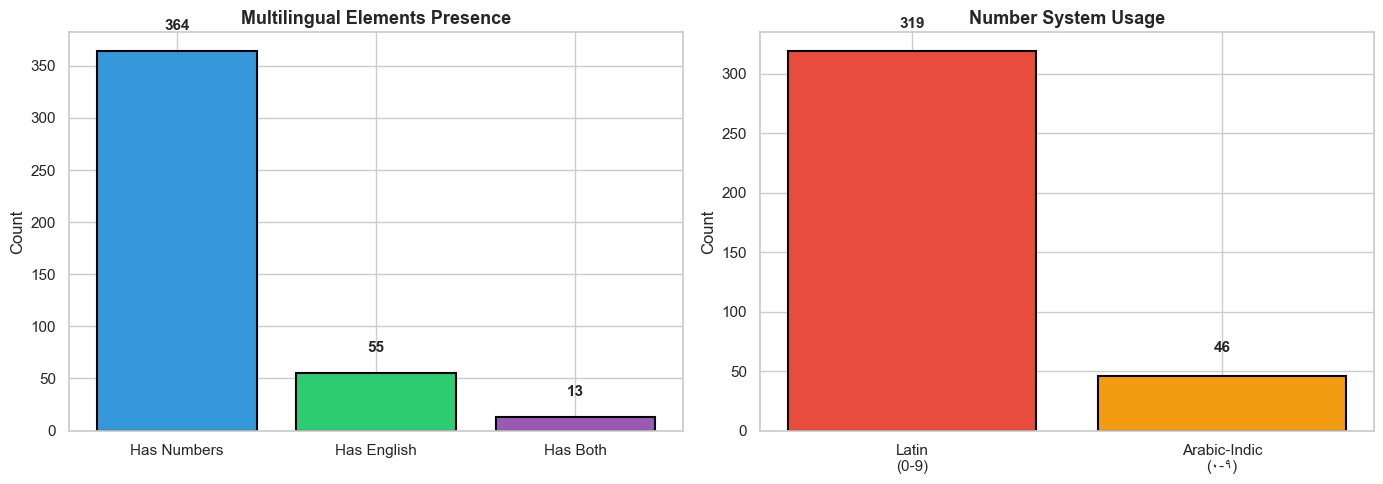


BY POLARIZATION LABEL

Texts with Numbers:
polarization
0    300
1     64
Name: has_numbers, dtype: int64

Texts with English:
polarization
0    34
1    21
Name: has_english, dtype: int64

Texts with Latin Numbers:
polarization
0    274
1     45
Name: has_latin_numbers, dtype: int64

EXAMPLES

🔢 Examples with LATIN NUMBERS (0-9):
--------------------------------------------------

Label: 1
Text: أول شي انتي تشبهين شغالتنا في البيت

ثاني شي انتي ملكة جمال الإزباله

3 جميع الاسعودين أحلى منك انتي...
Number count: 1

Label: 1
Text: شو هيدي الفنانه ،،قي قمة السفله
راغب وشمس وفرح ونانسي تاج ع راسها
لتخلوها في برنامج ارب ايدل موسم 4
كل يكرها ميحبها...
Number count: 1

Label: 1
Text: يا جماعه الراقصات دول ملهومشي اصل بنات شوارع. والاعلام بيصور للعرب ان مصر عباره عن العاهرات دول نسبه السنه 60في الميه من سكان مصر....
Number count: 2


🔤 Examples with ENGLISH CHARACTERS:
--------------------------------------------------

Label: 1
Text: مين عم يقول الdislikeأكتر؟؟؟ههههه
ياحبيبي طلعت شاذة كمان ه

In [52]:
# Analysis of Numbers and English Characters

print("=" * 50)
print("NUMERIC & ENGLISH CHARACTER ANALYSIS")
print("=" * 50)

# Check for numbers and English characters
train_df['has_numbers'] = train_df['text'].str.contains(r'\d', regex=True)
train_df['has_english'] = train_df['text'].str.contains(r'[a-zA-Z]', regex=True)
train_df['has_latin_numbers'] = train_df['text'].str.contains(r'[0-9]', regex=True)
train_df['has_arabic_numbers'] = train_df['text'].str.contains(r'[٠-٩]', regex=True)

train_df['num_count'] = train_df['text'].str.count(r'\d')
train_df['english_char_count'] = train_df['text'].str.count(r'[a-zA-Z]')

# Summary statistics
print("\n📊 Presence Statistics:")
print(f"Texts with numbers (any): {train_df['has_numbers'].sum()} ({train_df['has_numbers'].mean()*100:.2f}%)")
print(f"Texts with Latin numbers (0-9): {train_df['has_latin_numbers'].sum()} ({train_df['has_latin_numbers'].mean()*100:.2f}%)")
print(f"Texts with Arabic-Indic numbers (٠-٩): {train_df['has_arabic_numbers'].sum()} ({train_df['has_arabic_numbers'].mean()*100:.2f}%)")
print(f"Texts with English characters: {train_df['has_english'].sum()} ({train_df['has_english'].mean()*100:.2f}%)")

print("\n📈 Count Statistics:")
print(f"Average numbers per text: {train_df['num_count'].mean():.2f}")
print(f"Average English chars per text: {train_df['english_char_count'].mean():.2f}")
print(f"Max numbers in a text: {train_df['num_count'].max()}")
print(f"Max English chars in a text: {train_df['english_char_count'].max()}")

# Improved Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Combined presence chart
categories = ['Has Numbers', 'Has English', 'Has Both']
counts = [
    train_df['has_numbers'].sum(),
    train_df['has_english'].sum(),
    (train_df['has_numbers'] & train_df['has_english']).sum()
]
colors_combo = ['#3498db', '#2ecc71', '#9b59b6']

axes[0].bar(categories, counts, color=colors_combo, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Multilingual Elements Presence', fontsize=13, fontweight='bold')
for i, v in enumerate(counts):
    axes[0].text(i, v + 20, str(v), ha='center', fontweight='bold', fontsize=11)

# 2. Number system comparison
num_systems = ['Latin\n(0-9)', 'Arabic-Indic\n(٠-٩)']
num_counts = [
    train_df['has_latin_numbers'].sum(),
    train_df['has_arabic_numbers'].sum()
]
colors_nums = ['#e74c3c', '#f39c12']

axes[1].bar(num_systems, num_counts, color=colors_nums, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title('Number System Usage', fontsize=13, fontweight='bold')
for i, v in enumerate(num_counts):
    axes[1].text(i, v + 20, str(v), ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

# Analysis by polarization label
print("\n" + "=" * 50)
print("BY POLARIZATION LABEL")
print("=" * 50)
print("\nTexts with Numbers:")
print(train_df.groupby('polarization')['has_numbers'].sum())
print("\nTexts with English:")
print(train_df.groupby('polarization')['has_english'].sum())
print("\nTexts with Latin Numbers:")
print(train_df.groupby('polarization')['has_latin_numbers'].sum())

# Examples of texts with numbers and English characters
print("\n" + "=" * 50)
print("EXAMPLES")
print("=" * 50)

print("\n🔢 Examples with LATIN NUMBERS (0-9):")
print("-" * 50)
texts_with_latin = train_df[train_df['has_latin_numbers']].head(3)
for idx, row in texts_with_latin.iterrows():
    print(f"\nLabel: {row['polarization']}")
    print(f"Text: {row['text'][:200]}...")
    print(f"Number count: {row['num_count']}")

print("\n\n🔤 Examples with ENGLISH CHARACTERS:")
print("-" * 50)
texts_with_english = train_df[train_df['has_english']].head(3)
for idx, row in texts_with_english.iterrows():
    print(f"\nLabel: {row['polarization']}")
    print(f"Text: {row['text'][:200]}...")
    print(f"English char count: {row['english_char_count']}")

print("\n\n🔢🔤 Examples with BOTH numbers AND English:")
print("-" * 50)
texts_with_both = train_df[train_df['has_numbers'] & train_df['has_english']].head(3)
if len(texts_with_both) > 0:
    for idx, row in texts_with_both.iterrows():
        print(f"\nLabel: {row['polarization']}")
        print(f"Text: {row['text'][:200]}...")
        print(f"Number count: {row['num_count']} | English char count: {row['english_char_count']}")
else:
    print("No texts found with both numbers and English characters.")

print("\n\n📊 Examples with ARABIC-INDIC NUMBERS (٠-٩):")
print("-" * 50)
arabic_num_examples = train_df[train_df['has_arabic_numbers']].head(3)
if len(arabic_num_examples) > 0:
    for idx, row in arabic_num_examples.iterrows():
        print(f"\nLabel: {row['polarization']}")
        print(f"Text: {row['text'][:200]}...")
else:
    print("No texts found with Arabic-Indic numbers.")